<a href="https://colab.research.google.com/github/KevWebb/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Kevona_Webb_LS_DS4_124_Make_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Make features

Objectives
-  understand the purpose of feature engineering
-  work with strings in pandas
- work with dates and times in pandas

Links
- [Feature Engineering](https://en.wikipedia.org/wiki/Feature_engineering)
- Python Data Science Handbook
  - [Chapter 3.10](https://jakevdp.github.io/PythonDataScienceHandbook/03.10-working-with-strings.html), Vectorized String Operations
  - [Chapter 3.11](https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html), Working with Time Series

## Get LendingClub data

[Source](https://www.lendingclub.com/info/download-data.action)

In [1]:
!wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip

--2019-04-25 21:07:23--  https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 64.48.1.20
Connecting to resources.lendingclub.com (resources.lendingclub.com)|64.48.1.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2018Q4.csv.zip.5’

LoanStats_2018Q4.cs     [               <=>  ]  21.37M   808KB/s    in 27s     

2019-04-25 21:07:51 (800 KB/s) - ‘LoanStats_2018Q4.csv.zip.5’ saved [22408410]



In [3]:
!unzip LoanStats_2018Q4.csv.zip

Archive:  LoanStats_2018Q4.csv.zip
replace LoanStats_2018Q4.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [0]:
!head LoanStats_2018Q4.csv

In [0]:
!tail LoanStats_2018Q4.csv

## Load LendingClub data

pandas documentation
- [`read_csv`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)
- [`options.display`](https://pandas.pydata.org/pandas-docs/stable/options.html#available-options)

In [0]:
import pandas as pd
pd.options.display.max_rows = 500
pd.options.display.max_columns = 500

In [20]:
df = pd.read_csv('LoanStats_2018Q4.csv', skiprows=1, skipfooter=2, engine='python')
print(df.shape)
df.head()

(128412, 145)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,10000,10000,10000.0,36 months,10.33%,324.23,B,B1,NaN,< 1 year,MORTGAGE,280000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,974xx,OR,6.15,2,Jan-1996,0,18.0,NaN,14,0,9082,38%,23,w,9521.66,9521.66,639.85,639.85,478.34,161.51,0.0,0.0,0.0,Feb-2019,324.23,Apr-2019,Mar-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,671,246828,1,3,2,3,1.0,48552,62.0,1,3,4923,46.0,23900,2,7,1,7,17631.0,11897.0,43.1,0,0,158.0,275,11,1,1,11.0,NaN,11.0,NaN,0,3,4,7,7,10,9,11,4,14,0.0,0,0,4,91.3,28.6,0,0,367828,61364,20900,54912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DirectPay,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2500,2500,2500.0,36 months,13.56%,84.92,C,C1,Chef,10+ years,RENT,55000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,109xx,NY,18.24,0,Apr-2001,1,NaN,45.0,9,1,4341,10.3%,34,w,2386.02,2386.02,167.02,167.02,113.98,53.04,0.0,0.0,0.0,Feb-2019,84.92,Apr-2019,Mar-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,16901,2,2,1,2,2.0,12560,69.0,2,7,2137,28.0,42000,1,11,2,9,1878.0,34360.0,5.9,0,0,140.0,212,1,1,0,1.0,NaN,2.0,NaN,0,2,5,3,3,16,7,18,5,9,0.0,0,0,3,100.0,0.0,1,0,60124,16901,36500,18124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,12000,12000,12000.0,60 months,13.56%,276.49,C,C1,NaN,< 1 year,MORTGAGE,40000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,180xx,PA,19.23,0,Aug-2005,2,NaN,NaN,8,0,23195,55.5%,9,w,11716.63,11716.63,539.42,539.42,283.37,256.05,0.0,0.0,0.0,Feb-2019,276.49,Apr-2019,Mar-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,32462,1,1,1

In [21]:
df.isnull().sum().sort_values(ascending=False)

id                                            128412
member_id                                     128412
url                                           128412
desc                                          128412
hardship_loan_status                          128411
hardship_amount                               128411
hardship_start_date                           128411
hardship_end_date                             128411
payment_plan_start_date                       128411
hardship_length                               128411
hardship_dpd                                  128411
hardship_payoff_balance_amount                128411
orig_projected_additional_accrued_interest    128411
hardship_status                               128411
hardship_last_payment_amount                  128411
hardship_reason                               128411
hardship_type                                 128411
deferral_term                                 128411
settlement_percentage                         

In [0]:
df.tail()

## Work with strings

For machine learning, we usually want to replace strings with numbers.

We can get info about which columns have a datatype of "object" (strings)

In [0]:
df.dtypes

In [0]:
df['int_rate']

In [0]:
df.describe(exclude='number')

In [0]:
df.loc[0][5]

### Dataframe Filtering

In [0]:
col_name = 'term'
desktop_users = df[df['mobile'] == False]
mobile_users = df[df['mobile'] == True]

### Convert `int_rate`

Define a function to remove percent signs from strings and convert to floats

In [0]:
'13.56%'.strip("%")

In [0]:
type('13.56%'.strip("%"))

In [0]:
float('13.56%'.strip('%'))

In [0]:
type(float('13.56%'.strip('%')))

### List Comprehension Example

In [23]:
example_list = ['13.55%','13.56%','13.54%']
  
def remove_percent(string):
  return float(string.strip('%'))

# remove_percent('13.55%')

[remove_percent(x) for x in example_list]

[13.55, 13.56, 13.54]

Apply the function to the `int_rate` column

In [25]:
df['int_rate'] = df['int_rate'].apply(remove_percent)
df['int_rate'].head()

0    10.33
1    13.56
2    13.56
3    14.47
4    17.97
Name: int_rate, dtype: float64

In [0]:
df.dtypes

### Dataframe Filtering by Interest Rate

In [0]:
int_rate_greater_than_13 = df[df['int_rate'] >= 14.00]

int_rate_greater_than_13.reset_index()

### Clean `emp_title`

Look at top 20 titles

In [0]:
df['emp_title'].value_counts(dropna=False).head(20)

How often is `emp_title` null?

In [27]:
df['emp_title'].isnull().sum()

20947

Clean the title and handle missing values

In [28]:
import numpy as np #???
examples = ['owner', 'Supervisor', ' Project Manager', np.NaN]


def clean_title(title):
  if isinstance(title, str):
    return title.strip().title()
  else:
    return "Unknown"
  
[clean_title(x) for x in examples]

['Owner', 'Supervisor', 'Project Manager', 'Unknown']

In [0]:
df['emp_title'] = df['emp_title'].apply(clean_title)

In [30]:
df['emp_title'].value_counts()

Unknown                                     20947
Teacher                                      2557
Manager                                      2395
Registered Nurse                             1418
Driver                                       1258
Supervisor                                   1160
Truck Driver                                  920
Rn                                            834
Office Manager                                805
Sales                                         803
General Manager                               791
Project Manager                               720
Owner                                         625
Director                                      523
Operations Manager                            518
Sales Manager                                 500
Police Officer                                440
Nurse                                         425
Technician                                    420
Engineer                                      412


### Create `emp_title_manager`

pandas documentation: [`str.contains`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.contains.html)

In [0]:
df.emp_title_manager = True # Don't do this when trying to create a column
df['emp_title_manager'] = True # Do this

In [0]:
df['emp_title_manager'] = df['emp_title'].str.contains("Manager")
df['emp_title_manager']

In [33]:
managers = df[df['emp_title_manager'] == True] 
plebians = df[df['emp_title_manager'] == False]

print(managers['int_rate'].mean())
print(plebians['int_rate'].mean())

12.761061961748679
12.957875870805788


In [34]:
print(managers['int_rate'].std())
print(plebians['int_rate'].std())

5.07073567535501
5.092862114005018


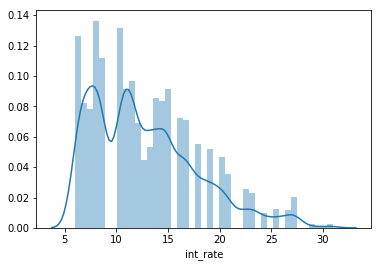

In [35]:
# help(managers['int_rate'].plot())
import seaborn as sns
sns.distplot(managers['int_rate'])

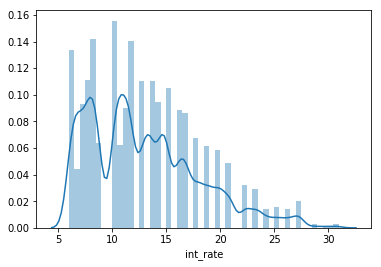

In [36]:
sns.distplot(plebians['int_rate'])

In [37]:
managers.head(20)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,emp_title_manager
9,NaN,NaN,8000,8000,8000.0,36 months,23.40,311.35,E,E1,Manager,10+ years,OWN,43000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,357xx,AL,33.24,0,Jan-1995,0,NaN,107.0,8,1,9019,81.3%,16,w,7686.27,7686.27,607.10,607.10,313.73,293.37,0.0,0.0,0.0,Feb-2019,311.35,Apr-2019,Mar-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,169223,0,3,2,2,7.0,22059,69.0,0,0,2174,72.0,11100,1,1,1,2,21153.0,126.0,94.5,0,0,148.0,287,44,7,1,51.0,NaN,7.0,NaN,0,1,4,1,2,8,4,7,4,8,0.0,0,0,2,100.0,100.0,1,0,199744,31078,2300,32206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,True
17,NaN,NaN,35000,35000,35000.0,60 months,15.02,833.02,C,C3,Sr Sales Manager,10+ years,MORTGAGE,290000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,656xx,MO,7.60,0,Dec-2004,0,29.0,NaN,15,0,29416,93.7%,33,w,34205.18,34205.18,1622.23,1622.23,794.82,827.41,0.0,0.0,0.0,Feb-2019,833.02,Apr-2019,Mar-2019,1,42.0,1,Individual,NaN,NaN,NaN,0,149,479986,1,8,0,2,17.0,58023,58.0,0,1,12297,75.0,31400,0,0,2,4,31999.0,1038.0,95.2,0,0,168.0,167,22,6,3,22.0,42.0,8.0,29.0,0,3,4,3,8,17,6,13,4,15,0.0,0,0,1,87.9,100.0,0,0,513173,87439,21600,82773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DirectPay,N,NaN,NaN,NaN,NaN,NaN,NaN,True
21,NaN,NaN,25000,25000,25000.0,60 months,16.14,609.82,C,C4,Production Manager,5 years,MORTGAGE,45000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,703xx,LA,37.09,0,Sep-2003,0,NaN,NaN,7,0,8901,36.8%,21,w,24449.18,24449.18,1186.02,1186.02,550.82,635.20,0.0,0.0,0.

## Work with dates

pandas documentation
- [to_datetime](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html)
- [Time/Date Components](https://pandas.pydata.org/pandas-docs/stable/timeseries.html#time-date-components) "You can access these properties via the `.dt` accessor"

In [0]:
df['issue_d'].head().values

In [38]:
df['issue_d'].describe()

count       128412
unique           3
top       Oct-2018
freq         46305
Name: issue_d, dtype: object

In [0]:
df['issue_d'] = pd.to_datetime(df['issue_d'], infer_datetime_format=True)

In [40]:
df['issue_d'].head().values

array(['2018-12-01T00:00:00.000000000', '2018-12-01T00:00:00.000000000',
       '2018-12-01T00:00:00.000000000', '2018-12-01T00:00:00.000000000',
       '2018-12-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [41]:
df['issue_d'].describe()

count                  128412
unique                      3
top       2018-10-01 00:00:00
freq                    46305
first     2018-10-01 00:00:00
last      2018-12-01 00:00:00
Name: issue_d, dtype: object

In [0]:
df['issue_d'].dt.year
df['issue_d'].dt.month

In [43]:
df['issue_year'] = df['issue_d'].dt.year
df['issue_month'] = df['issue_d'].dt.month
print(df.shape)
df.head()

(128412, 148)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,emp_title_manager,issue_year,issue_month
0,NaN,NaN,10000,10000,10000.0,36 months,10.33,324.23,B,B1,Unknown,< 1 year,MORTGAGE,280000.0,Not Verified,2018-12-01,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,974xx,OR,6.15,2,Jan-1996,0,18.0,NaN,14,0,9082,38%,23,w,9521.66,9521.66,639.85,639.85,478.34,161.51,0.0,0.0,0.0,Feb-2019,324.23,Apr-2019,Mar-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,671,246828,1,3,2,3,1.0,48552,62.0,1,3,4923,46.0,23900,2,7,1,7,17631.0,11897.0,43.1,0,0,158.0,275,11,1,1,11.0,NaN,11.0,NaN,0,3,4,7,7,10,9,11,4,14,0.0,0,0,4,91.3,28.6,0,0,367828,61364,20900,54912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DirectPay,N,NaN,NaN,NaN,NaN,NaN,NaN,False,2018,12
1,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,Chef,10+ years,RENT,55000.0,Not Verified,2018-12-01,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,109xx,NY,18.24,0,Apr-2001,1,NaN,45.0,9,1,4341,10.3%,34,w,2386.02,2386.02,167.02,167.02,113.98,53.04,0.0,0.0,0.0,Feb-2019,84.92,Apr-2019,Mar-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,16901,2,2,1,2,2.0,12560,69.0,2,7,2137,28.0,42000,1,11,2,9,1878.0,34360.0,5.9,0,0,140.0,212,1,1,0,1.0,NaN,2.0,NaN,0,2,5,3,3,16,7,18,5,9,0.0,0,0,3,100.0,0.0,1,0,60124,16901,36500,18124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,False,2018,12
2,NaN,NaN,12000,12000,12000.0,60 months,13.56,276.49,C,C1,Unknown,< 1 year,MORTGAGE,40000.0,Not Verified,2018-12-01,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,180xx,PA,19.23,0,Aug-2005,2,NaN,NaN,8,0,23195,55.5%,9,w,11716.63,11716.63,539.42,539.42,283.37,256.05,0.0,0.0,0.0,

In [44]:
df['issue_month'].value_counts()

10    46305
11    41973
12    40134
Name: issue_month, dtype: int64

In [45]:
[col for col in df if col.endswith('_d')]

['issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

In [46]:
df['earliest_cr_line'].head()

0    Jan-1996
1    Apr-2001
2    Aug-2005
3    Oct-1999
4    Oct-2005
Name: earliest_cr_line, dtype: object

In [0]:
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], 
                                        infer_datetime_format=True)

In [0]:
df['issue_d'] - df['earliest_cr_line']

In [0]:
(df['issue_d'] - df['earliest_cr_line']).dt.days

In [50]:
df['days_from_earliest_credit_to_issue'] = (
    df['issue_d'] - df['earliest_cr_line']).dt.days

df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,emp_title_manager,issue_year,issue_month,days_from_earliest_credit_to_issue
0,NaN,NaN,10000,10000,10000.0,36 months,10.33,324.23,B,B1,Unknown,< 1 year,MORTGAGE,280000.0,Not Verified,2018-12-01,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,974xx,OR,6.15,2,1996-01-01,0,18.0,NaN,14,0,9082,38%,23,w,9521.66,9521.66,639.85,639.85,478.34,161.51,0.0,0.0,0.0,Feb-2019,324.23,Apr-2019,Mar-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,671,246828,1,3,2,3,1.0,48552,62.0,1,3,4923,46.0,23900,2,7,1,7,17631.0,11897.0,43.1,0,0,158.0,275,11,1,1,11.0,NaN,11.0,NaN,0,3,4,7,7,10,9,11,4,14,0.0,0,0,4,91.3,28.6,0,0,367828,61364,20900,54912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DirectPay,N,NaN,NaN,NaN,NaN,NaN,NaN,False,2018,12,8370
1,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,Chef,10+ years,RENT,55000.0,Not Verified,2018-12-01,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,109xx,NY,18.24,0,2001-04-01,1,NaN,45.0,9,1,4341,10.3%,34,w,2386.02,2386.02,167.02,167.02,113.98,53.04,0.0,0.0,0.0,Feb-2019,84.92,Apr-2019,Mar-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,16901,2,2,1,2,2.0,12560,69.0,2,7,2137,28.0,42000,1,11,2,9,1878.0,34360.0,5.9,0,0,140.0,212,1,1,0,1.0,NaN,2.0,NaN,0,2,5,3,3,16,7,18,5,9,0.0,0,0,3,100.0,0.0,1,0,60124,16901,36500,18124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,False,2018,12,6453
2,NaN,NaN,12000,12000,12000.0,60 months,13.56,276.49,C,C1,Unknown,< 1 year,MORTGAGE,40000.0,Not Verified,2018-12-01,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,180xx,PA,19.23,0,2005-08-01,2,NaN,NaN,8,0,23195,55.5%,9,w,11716.6

In [51]:
df['days_from_earliest_credit_to_issue'].describe()

count    128412.000000
mean       5859.891490
std        2886.535578
min        1126.000000
25%        4049.000000
50%        5266.000000
75%        7244.000000
max       25171.000000
Name: days_from_earliest_credit_to_issue, dtype: float64

In [52]:
25171 / 365

68.96164383561644

In [53]:
df.describe(include='datetime')

,issue_d,earliest_cr_line
count,128412,128412
unique,3,644
top,2018-10-01 00:00:00,2006-08-01 00:00:00
freq,46305,1130
first,2018-10-01 00:00:00,1950-01-01 00:00:00
last,2018-12-01 00:00:00,2015-11-01 00:00:00


# ASSIGNMENT

- Replicate the lesson code.

- Convert the `term` column from string to integer.

- Make a column named `loan_status_is_great`. It should contain the integer 1 if `loan_status` is "Current" or "Fully Paid." Else it should contain the integer 0.

- Make `last_pymnt_d_month` and `last_pymnt_d_year` columns.

In [0]:
df['loan_status'].value_counts(dropna=False)

In [60]:
#Convert the term column from string to integer
df['term'].head()


0     36 months
1     36 months
2     60 months
3     60 months
4     60 months
Name: term, dtype: object

In [0]:
#Make a column named 'loan_status_is_great.'
df['loan_status_is_great'] = df['loan_status'].str.contains('Current|Fully Paid')
df['loan_status_is_great'].value_counts()

In [0]:
#Make last_pymnt_d_month and last_pymnt_d_year columns.
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'], infer_datetime_format=True)
df['last_pymnt_d'].head()
df['last_pymnt_d_month'] = df['last_pymnt_d'].dt.month
df['last_pymnt_d_year'] = df['last_pymnt_d'].dt.year
df['last_pymnt_d_year'] = df['last_pymnt_d_year']
df['last_pymnt_d_month'].head()

In [0]:
df['last_pymnt_d'].head()

In [0]:
df['last_pymnt_d_year'].head()

In [0]:
df.head()

# STRETCH OPTIONS

You can do more with the LendingClub or Instacart datasets.

LendingClub options:
- There's one other column in the dataframe with percent signs. Remove them and convert to floats. You'll need to handle missing values.
- Modify the `emp_title` column to replace titles with 'Other' if the title is not in the top 20. 
- Take initiatve and work on your own ideas!

Instacart options:
- Read [Instacart Market Basket Analysis, Winner's Interview: 2nd place, Kazuki Onodera](http://blog.kaggle.com/2017/09/21/instacart-market-basket-analysis-winners-interview-2nd-place-kazuki-onodera/), especially the **Feature Engineering** section. (Can you choose one feature from his bulleted lists, and try to engineer it with pandas code?)
- Read and replicate parts of [Simple Exploration Notebook - Instacart](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart). (It's the Python Notebook with the most upvotes for this Kaggle competition.)
- Take initiative and work on your own ideas!

You can uncomment and run the cells below to re-download and extract the Instacart data

In [0]:
# !wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# !tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# %cd instacart_2017_05_01